In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

In [2]:
#pip install yellowbrick

In [3]:
appearance = pd.read_excel("C:\\Users\\Surin\\Downloads\\appearances.xlsx")
appearance.head()

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3


In [4]:
appearance.shape

(3568, 11)

In [5]:
appearance.isnull().sum()

appearance_id     0
game_id           0
player_id         0
date              0
player_name       0
competition_id    0
yellow_cards      0
red_cards         0
goals             0
assists           0
minutes_played    0
dtype: int64

In [6]:
appearance.dtypes

appearance_id             object
game_id                    int64
player_id                  int64
date              datetime64[ns]
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [7]:
int1 = appearance.select_dtypes(include="number")
int1

,game_id,player_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728,119169,0,0,0,0,90
1,2224732,161244,0,0,1,0,90
2,2224729,39467,0,0,0,0,90
3,2232104,119169,0,0,0,0,74
4,2219794,39475,0,0,0,0,3
...,...,...,...,...,...,...,...
3563,3415291,537467,0,0,1,0,77
3564,3415296,367423,1,0,0,0,84
3565,3431983,478940,0,0,0,0,90
3566,3450575,361104,0,0,0,0,6


In [8]:
game_event = pd.read_excel("C:\\Users\\Surin\\Downloads\\game_events.xlsx")
game_event.head()

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0


In [9]:
game_event.shape

(1849, 9)

In [10]:
conti1 = game_event.select_dtypes(include="number")
conti1.columns
#Since we cannot change the ids so we will not do outliers treatment here

Index(['game_id', 'minute', 'player_id', 'player_in_id', 'player_assist_id'], dtype='object')

In [11]:
int = game_event['minute'] 

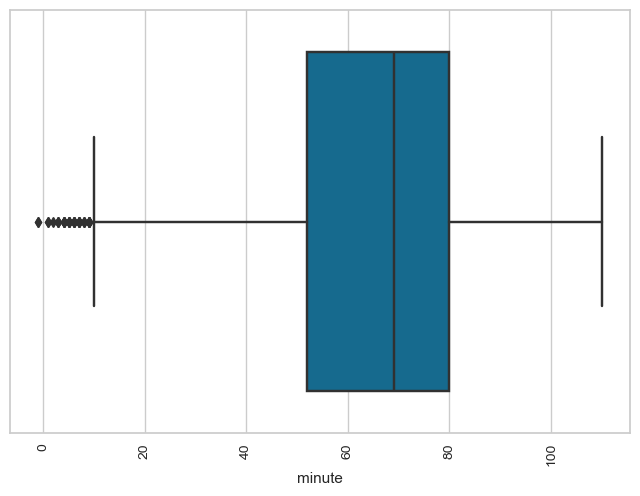

In [12]:
sns.boxplot(x=game_event['minute'])
plt.xticks(rotation=90)
plt.show()
#here we will not treat the minute column because the player might got substituted in the starting of the match 

In [13]:
#I am not treating outliers in the df 

In [14]:
games_lineups = pd.read_excel("C:\\Users\\Surin\\Downloads\\game_lineups.xlsx")
games_lineups.head()

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back


In [15]:
conti2 = games_lineups.select_dtypes(include="number")
conti2.columns
#Since we cannot change the ids and number so we will not do outliers treatment here

Index(['game_id', 'number', 'player_id', 'team_captain'], dtype='object')

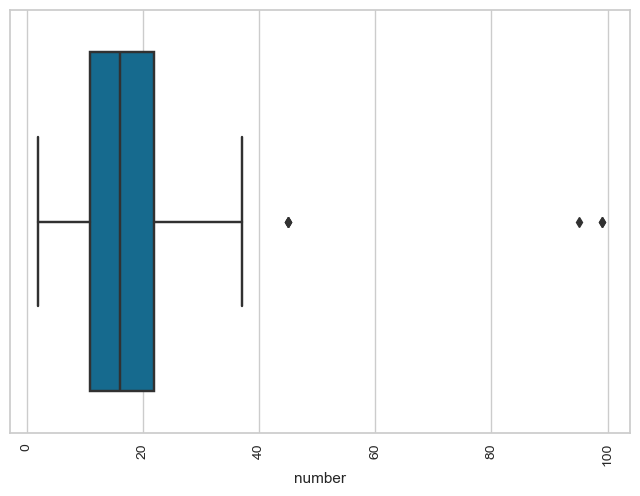

In [16]:
sns.boxplot(x=games_lineups['number'])
plt.xticks(rotation=90)
plt.show()
#The number column will not be treated as we cannot change the jersey number of a player

In [17]:
games_lineups.shape

(219, 8)

In [18]:
games = pd.read_excel("C:\\Users\\Surin\\Downloads\\games.xlsx")
games.head()

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league


In [19]:
games.shape

(3268, 20)

In [20]:
games.drop(["home_club_formation","away_club_formation"],axis=1,inplace=True)
#Dropping these two columns because there are no values in these columns

In [21]:
conti3 = games.select_dtypes(include="number")
conti3.columns

Index(['game_id', 'season', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'attendance'],
      dtype='object')

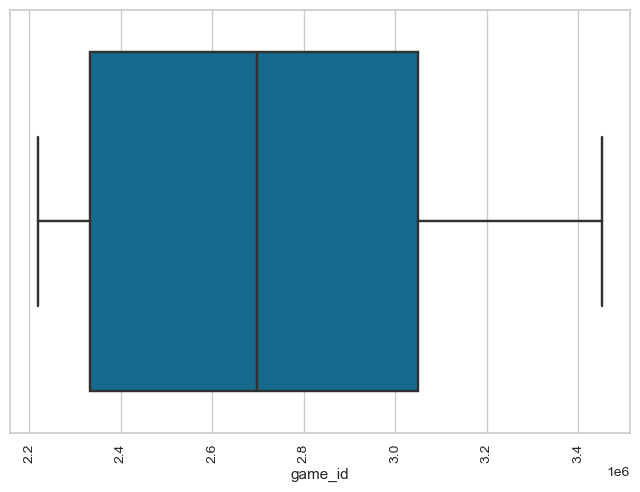

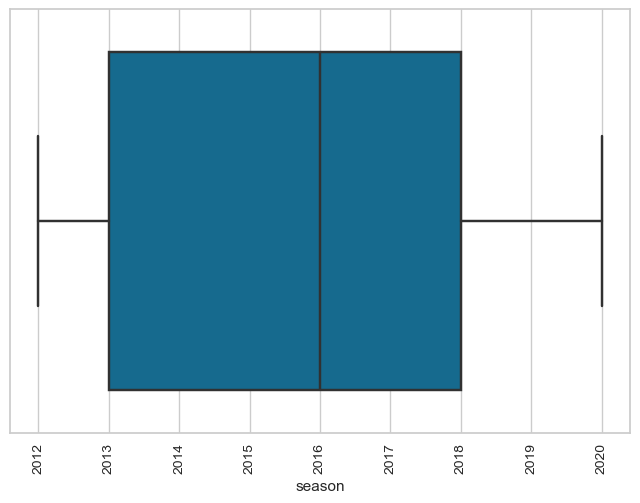

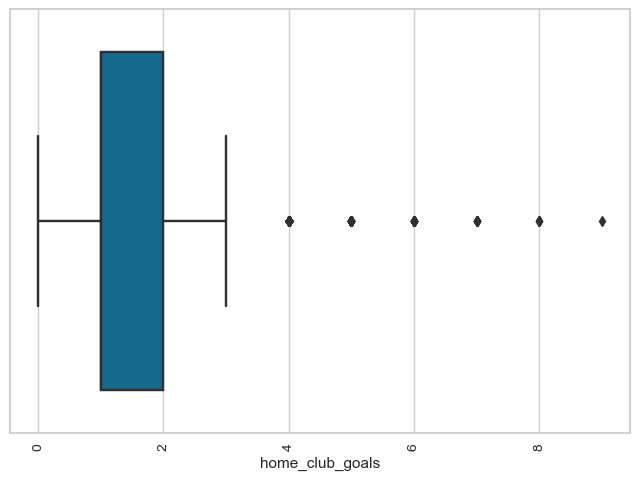

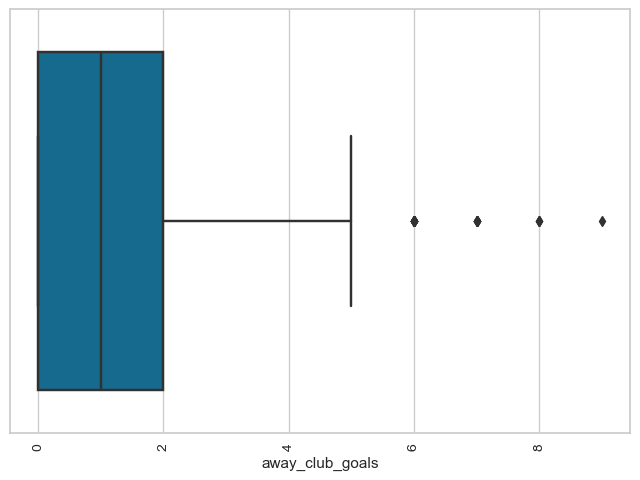

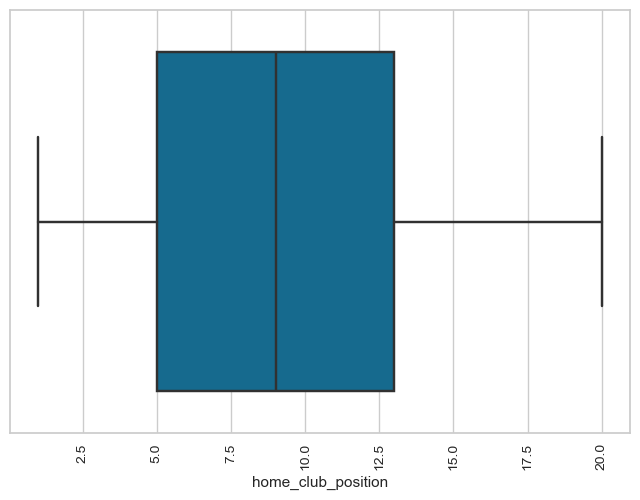

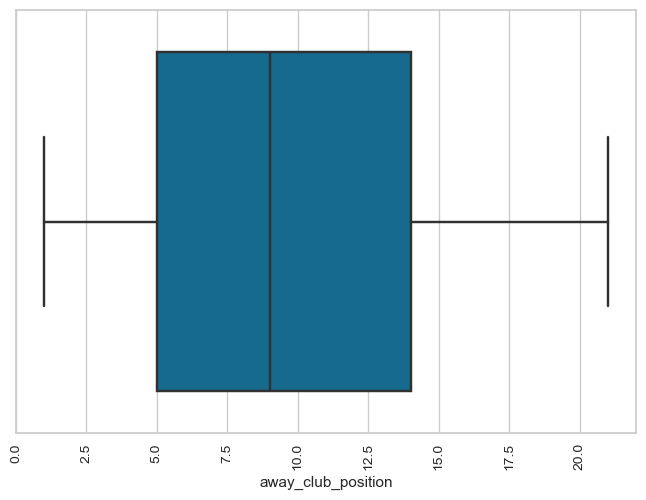

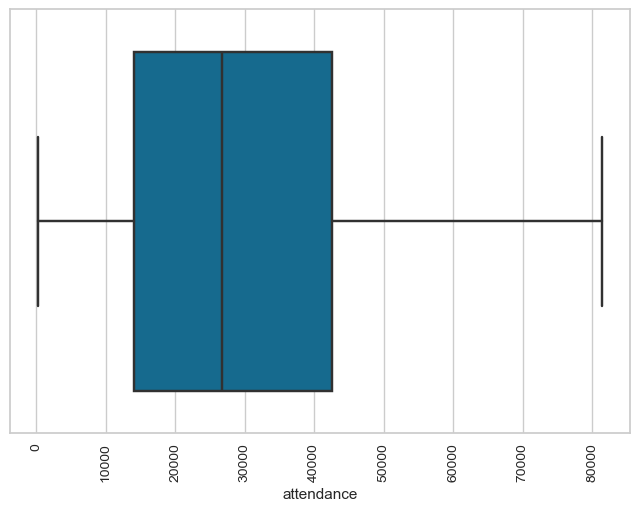

In [22]:
for g in conti3.columns:
    sns.boxplot(x=conti3[g])
    plt.xticks(rotation=90)
    plt.show()
#We cannot change the number of goals scored by the club so outliers treatment will not be done on them

In [23]:
players = pd.read_excel("C:\\Users\\Surin\\Downloads\\players.xlsx")
players.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.


In [24]:
players.shape

(152, 15)

In [25]:
conti4 = players.select_dtypes(include='number')
conti4

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
0,124732,2023,533,194.0,2000000.0,15000000.0
1,223047,2018,903,170.0,800000.0,1800000.0
2,307781,2016,289,173.0,1000000.0,1000000.0
3,370846,2023,506,183.0,14000000.0,15000000.0
4,484756,2023,1090,178.0,5000000.0,6000000.0
...,...,...,...,...,...,...
147,273570,2020,1283,182.0,NaN,400000.0
148,111783,2015,995,182.0,300000.0,2500000.0
149,160670,2014,16,175.0,400000.0,600000.0
150,3476,2014,148,NaN,NaN,4000000.0


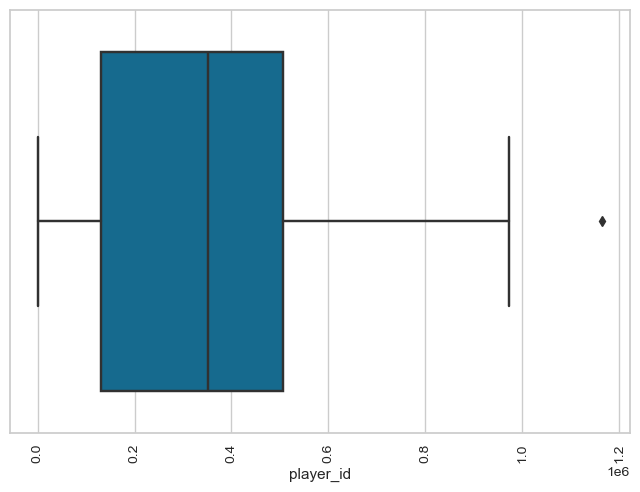

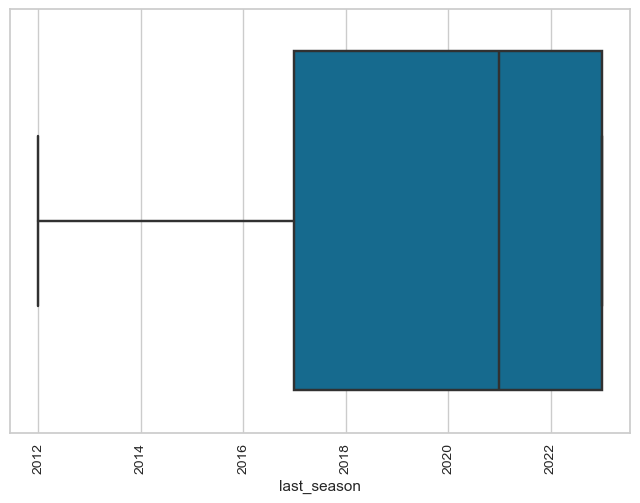

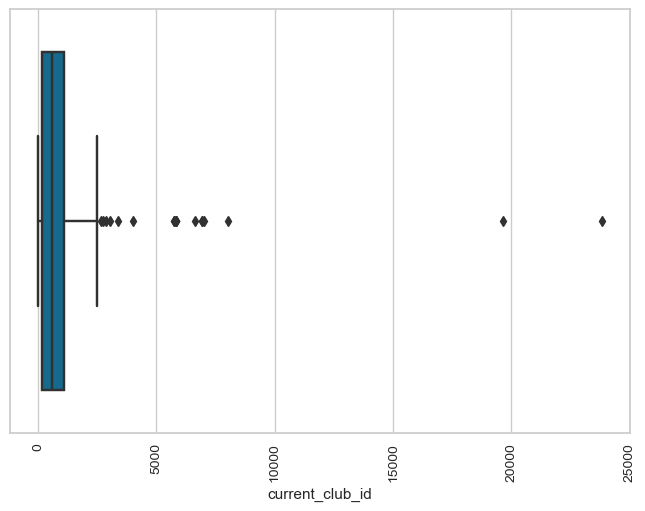

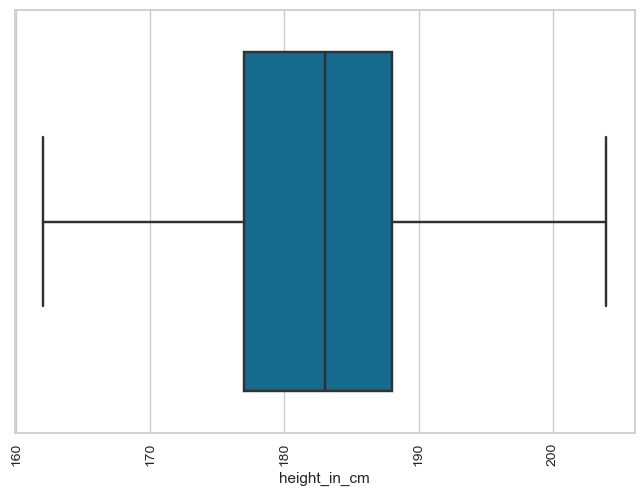

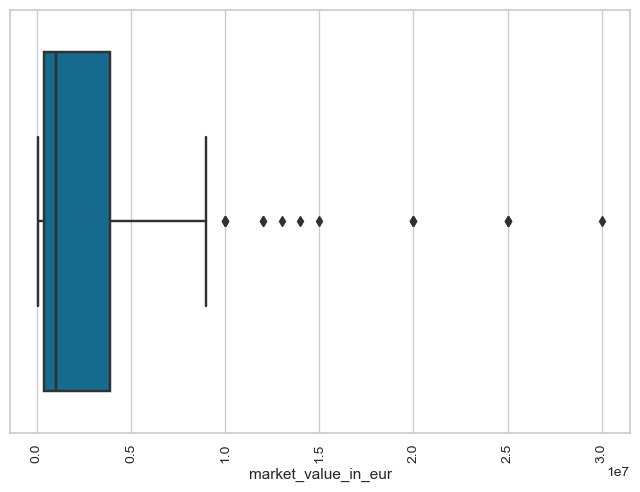

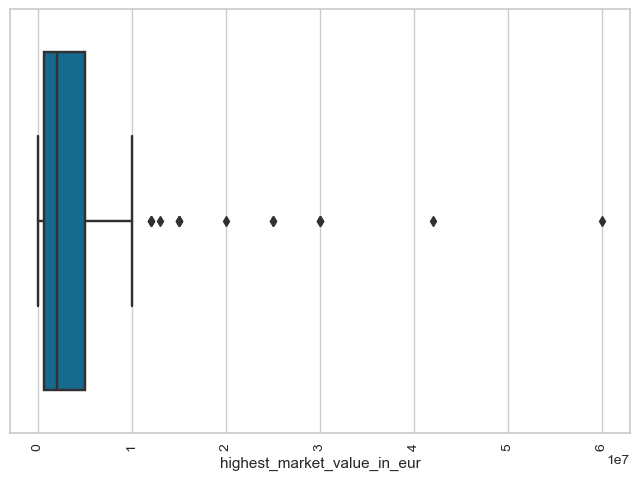

In [26]:
for p in conti4.columns:
    sns.boxplot(x=conti4[p])
    plt.xticks(rotation=90)
    plt.show()
#Since player_id is unique we will not do outliers treatment 
#we cannot change the current_club_id for players in which they are currently playing 
#Height of a player cannot be changed so no outliers treatment 
#Market value and highest market value of a player will also not be treated as we cannot change the market value of a player for the treatment

In [27]:
merged_df1= game_event.merge(games, on='game_id', how="outer")
merged_df1.head(1)

,game_event_id,date_x,game_id,minute,type,player_id,description,player_in_id,player_assist_id,competition_id,...,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62.0,Substitutions,1335.0,", Not reported",45668.0,NaN,DFB,...,NaN,Michael Wittwer,Mirko Slomka,Stadion an der Kreuzeiche,3168.0,Benjamin Cortus,NaN,Hannover 96,01:06:00,domestic_cup


In [28]:
merged_df2 = merged_df1.merge(appearance, on='game_id', how="outer")
merged_df2.head(1)

,game_event_id,date_x,game_id,minute,type,player_id_x,description,player_in_id,player_assist_id,competition_id_x,...,appearance_id,player_id_y,date,player_name,competition_id_y,yellow_cards,red_cards,goals,assists,minutes_played
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62.0,Substitutions,1335.0,", Not reported",45668.0,NaN,DFB,...,2221641_1335,1335.0,2012-08-19,Steven Cherundolo,DFB,0.0,0.0,0.0,0.0,62.0


In [29]:
merged_df2.columns

Index(['game_event_id', 'date_x', 'game_id', 'minute', 'type', 'player_id_x',
       'description', 'player_in_id', 'player_assist_id', 'competition_id_x',
       'season', 'round', 'date_y', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'appearance_id', 'player_id_y', 'date', 'player_name',
       'competition_id_y', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [30]:
games_lineups.columns

Index(['game_lineups_id', 'game_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object')

In [31]:
merged_df3 = merged_df2.merge(games_lineups, on='game_id', how='outer')
merged_df3.head(1)

,game_event_id,date_x,game_id,minute,type_x,player_id_x,description,player_in_id,player_assist_id,competition_id_x,...,goals,assists,minutes_played,game_lineups_id,type_y,number,player_id,player_name_y,team_captain,position
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62.0,Substitutions,1335.0,", Not reported",45668.0,NaN,DFB,...,0.0,0.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
merged_df3.dtypes

game_event_id                     object
date_x                    datetime64[ns]
game_id                            int64
minute                           float64
type_x                            object
player_id_x                      float64
description                       object
player_in_id                     float64
player_assist_id                 float64
competition_id_x                  object
season                           float64
round                             object
date_y                    datetime64[ns]
home_club_goals                  float64
away_club_goals                  float64
home_club_position               float64
away_club_position               float64
home_club_manager_name            object
away_club_manager_name            object
stadium                           object
attendance                       float64
referee                           object
home_club_name                    object
away_club_name                    object
aggregate       

In [33]:
merged_df4 = merged_df3.merge(players, on="player_id", how="outer")
merged_df4.head(1)

,game_event_id,date_x,game_id,minute,type_x,player_id_x,description,player_in_id,player_assist_id,competition_id_x,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641.0,62.0,Substitutions,1335.0,", Not reported",45668.0,NaN,DFB,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [34]:
merged_df4.shape

(4811, 57)

In [35]:
df = merged_df4.copy()

In [36]:
df.to_csv("C:\\Users\\Surin\\Downloads\\Football_data_merged_uncleaned.csv")

In [37]:
df1 = pd.read_csv("C:\\Users\\Surin\\Downloads\\Football_data_merged_uncleaned.csv")
df1.head(1)

,Unnamed: 0,game_event_id,date_x,game_id,minute,type_x,player_id_x,description,player_in_id,player_assist_id,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641.0,62.0,Substitutions,1335.0,", Not reported",45668.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
#Since these columns are empty we have to drop them

In [39]:
df1.isnull().sum()

game_event_id                  2727
date_x                         2727
game_id                         125
minute                         2727
type_x                         2727
player_id_x                    2727
description                    3742
player_in_id                   3519
player_assist_id               4644
competition_id_x               1002
season                         1002
round                          1002
date_y                         1002
home_club_goals                1002
away_club_goals                1002
home_club_position             1552
away_club_position             1552
home_club_manager_name         1008
away_club_manager_name         1008
stadium                        1002
attendance                     1143
referee                        1007
home_club_name                 1130
away_club_name                 1070
aggregate                      1002
competition_type               1002
appearance_id                  1002
player_id_y                 

In [40]:
df1.drop(['date_x','player_id_x','player_assist_id','date_y','description','player_id_y','competition_id_y','player_name_y'],axis=1,inplace=True)

In [41]:
df1['date'] = pd.to_datetime(df1['date'])
df1['date_of_birth'] = pd.to_datetime(df1['date_of_birth'])
df1['team_captain'] = df1['team_captain'].astype(bool)
df1['contract_expiration_date'] = pd.to_datetime(df1['contract_expiration_date'])

In [42]:
conti_df = df1.select_dtypes(include='number')
categ_df = df1.select_dtypes(exclude='number')

In [43]:
conti_df.columns

Index(['game_id', 'minute', 'player_in_id', 'season', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'attendance', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'number', 'player_id', 'last_season',
       'current_club_id', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [44]:
categ_df.columns

Index(['game_event_id', 'type_x', 'competition_id_x', 'round',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'referee', 'home_club_name', 'away_club_name', 'aggregate',
       'competition_type', 'appearance_id', 'date', 'player_name_x',
       'game_lineups_id', 'type_y', 'team_captain', 'position_x', 'name',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'contract_expiration_date', 'agent_name'],
      dtype='object')

In [45]:
for colum in conti_df.columns:
    median =  conti_df[colum].median()
    df1[colum] =  conti_df[colum].fillna(median)
    conti_df[colum] = conti_df[colum].fillna(median)

In [46]:
for col in categ_df.columns:
    df1[col] = categ_df[col].fillna("Data is not available")
  

In [47]:
df1.to_csv("C:\\Users\\Surin\\Downloads\\Football_data_merged_cleaned.csv")

In [48]:
cleaned_df = pd.read_csv("C:\\Users\\Surin\\Downloads\\Football_data_merged_cleaned.csv")

In [49]:
cleaned_df.drop(["Unnamed: 0"],axis=1,inplace=True)
cleaned_df.head(1)

,game_event_id,game_id,minute,type_x,player_in_id,competition_id_x,season,round,home_club_goals,away_club_goals,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,c6a3c088ed8a38d4ce074dd73b20d3da,2221641.0,62.0,Substitutions,45668.0,DFB,2012.0,First Round,1.0,6.0,...,Data is not available,Data is not available,Data is not available,Data is not available,Data is not available,183.0,2000000.0,4000000.0,Data is not available,Data is not available


In [50]:
cleaned_df.shape

(4811, 49)

# Areas of Interest
1. Performance Analysis
2. Player Profile and Market Value
3. Team Comparison
4. Attendance and Stadium Analysis
5. Referee Analysis
6. Substitution Patterns
7. Event Analysis
8. Competition Analysis
9. Player Attributes and Demographics
10. Contract Management

In [51]:
cleaned_df.columns

Index(['game_event_id', 'game_id', 'minute', 'type_x', 'player_in_id',
       'competition_id_x', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'appearance_id', 'date',
       'player_name_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_lineups_id', 'type_y', 'number', 'player_id',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

In [52]:
#Performance Analysis:(Part 3)
#Business Objective: Analyze and visualize player and team performance metrics to identify key performance indicators (KPIs) and trends.#Q1 Which players have the highest goal contributions (goals + assists) in year 2019?

In [53]:
#Q2 Which players have the highest contribution to their team's performance based on key metrics (e.g., goals, assists)?

In [54]:
#Q3 How does the home and away performance differ for teams in terms of key metrics (e.g., goals scored)?

In [55]:
######Probability######

In [56]:
#Q4 What is the probability that a player scores more than one goal in a match, given that they scored at least one goal?

In [57]:
df_player_goals  = cleaned_df[['goals','player_id']]

In [58]:
players_with_goals = df_player_goals [df_player_goals ['goals'] > 0]
prob_more_than_one_goal = (players_with_goals['goals'] >= 1).sum() / df_player_goals .shape[0] #scores atleast 1 goal

print(f"Probability that a player scores more than one goal given they scored at least one goal: {prob_more_than_one_goal:.2f}")

Probability that a player scores more than one goal given they scored at least one goal: 0.09


#Interpretation
This probability indicates that there's a 9% chance that a player will score more than one goal in a game, given that they have already scored at least one goal.

In [59]:
#Q5
players_gt_2_goals = cleaned_df[cleaned_df['goals'] > 2]

# Players who provided more than 1 assists
players_gt_2_assists = cleaned_df[cleaned_df['assists'] > 1]

# Joint probability: players who have both >2 goals and >1 assists
joint_probability = len(players_gt_2_goals[players_gt_2_goals['name'].isin(players_gt_2_assists['name'])]) / len(cleaned_df['name'].unique())
joint_probability

0.13725490196078433

#interpretation
Since the joint probability is 0.13(13%) This, means that two events cannot occur simultaneously.

In [60]:
####Part 2: Data Sampling, Central Limit Theorem, and Normal Distribution####

In [61]:
#Normal Distribution
#Q6) Are player heights normally distributed?

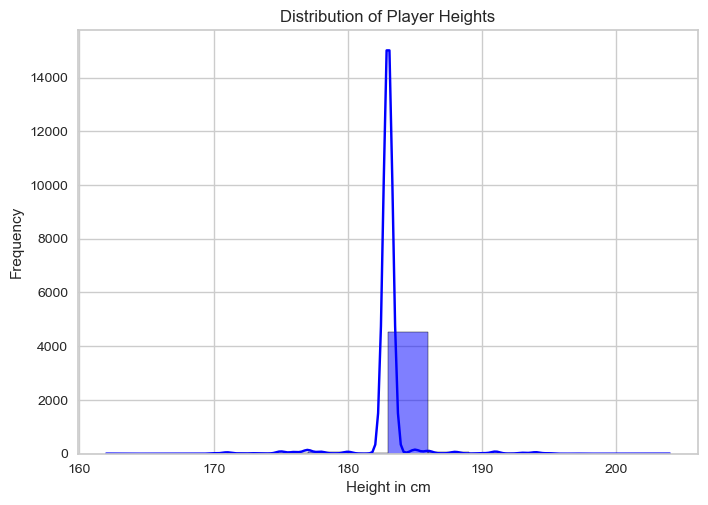

In [62]:
sns.histplot(cleaned_df['height_in_cm'], kde=True, color='blue')
plt.title('Distribution of Player Heights')
plt.xlabel('Height in cm')
plt.ylabel('Frequency')
plt.show()

#Interpretation
Based on the histogram and KDE, it appears that the majority of players in the dataset have heights between 185 and 190 cm, with a smaller number of players being taller or shorter. The left skew suggests that there are a few players who are significantly shorter than the average.

In [63]:
#Central Limit theorm with data sampling
def sample_means(cleaned_df, sample_size, num_samples=100):
    means = [np.mean(np.random.choice(cleaned_df['goals'], sample_size)) for i in range(num_samples)]
    return means
sample_size_10 = sample_means(cleaned_df, 10)
sample_size_30 = sample_means(cleaned_df, 30)
mean = np.mean(cleaned_df['goals'])

print(f" mean of goals: {mean:.2f}")
print(f"Mean with sample size 10: {np.mean(sample_size_10):.2f}")
print(f"Mean with sample size 30: {np.mean(sample_size_30):.2f}")

 mean of goals: 0.12
Mean with sample size 10: 0.12
Mean with sample size 30: 0.11


#Interpretation
As the sample size increases from 10 to 30, the sample means should become closer to the overall population mean. This is because the distribution of sample means approaches a normal distribution as the sample size grows larger

In [64]:
#Part4 
#Performance Analysis:
#Q7  Can we predict if a player is a captain based on their performance?

In [65]:
conti = cleaned_df.select_dtypes(include='number')
conti.columns

Index(['game_id', 'minute', 'player_in_id', 'season', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'attendance', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'number', 'player_id', 'last_season',
       'current_club_id', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [66]:
scaler = StandardScaler()

In [67]:
print(cleaned_df['team_captain'].unique())

[ True False]


In [68]:
for c in conti:
    cleaned_df[c] = scaler.fit_transform(cleaned_df[c].to_numpy().reshape(-1,1))

In [69]:
X_log = cleaned_df[['goals','assists','minutes_played']]

In [70]:
Y_log = cleaned_df[['team_captain']]

In [71]:
X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)

In [72]:
print(X_log_train.shape)
print(X_log_test.shape)
print(Y_log_test.shape)
print(Y_log_train.shape)

(3848, 3)
(963, 3)
(963, 1)
(3848, 1)


In [73]:
log_reg = LogisticRegression()

In [74]:
log_reg_model = log_reg.fit(X_log_train, Y_log_train)

In [75]:
log_reg.score(X_log_train, Y_log_train)

0.954002079002079

In [76]:
y_log_pred = log_reg.predict(X_log_test)

In [77]:

print(confusion_matrix(Y_log_test, y_log_pred))

[[  0  57]
 [  0 906]]


In [78]:
from sklearn.metrics import f1_score
print(f1_score(Y_log_test, y_log_pred,average='weighted'))

0.9121175299900491


In [79]:

print(accuracy_score(Y_log_test, y_log_pred))

0.940809968847352


In [80]:
roc = roc_auc_score(Y_log_test, log_reg.predict_proba(X_log_test)[:,1])
print("roc scroe is", roc)

roc scroe is 0.7113686534216336


In [81]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [82]:
print("recall", recall_score(Y_log_test, y_log_pred,average='weighted'))
print("precision", precision_score(Y_log_test, y_log_pred, average='weighted'))

recall 0.940809968847352
precision 0.8851233974825555


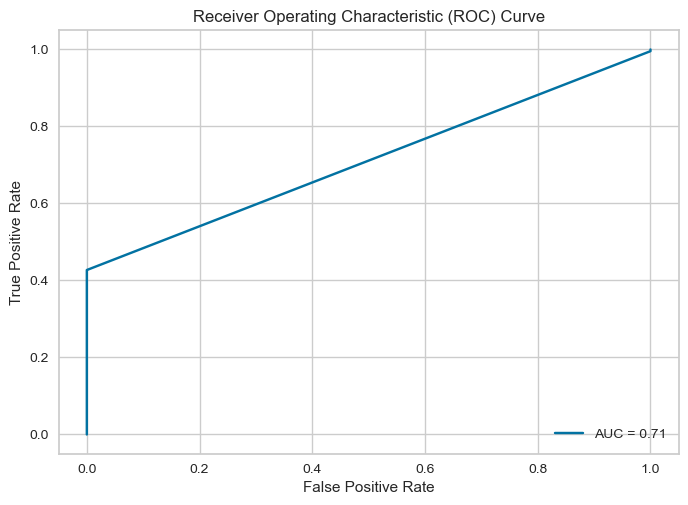

In [83]:
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
y_prob = log_reg.predict_proba(X_log_test)[:, 1]
fpr, tpr,_= roc_curve(Y_log_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay (fpr=fpr, tpr=tpr,roc_auc=roc_auc)
roc_display.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

#Interpretation 
The AUC is calculated as 0.71. This indicates that the model's performance is moderately good. An AUC of 1.0 would represent a perfect model, while an AUC of 0.5 would indicate random guessing

In [84]:
#Q8 Can we predict the player's position in a match based on their performance and match statistics?
#Target Variable: position_y

In [85]:
X = cleaned_df[['minutes_played', 'goals', 'assists', 'home_club_goals', 'away_club_goals']]  

In [86]:
Y = cleaned_df[['position_y']]

In [87]:
Y

,position_y
0,Data is not available
1,Data is not available
2,Data is not available
3,Data is not available
4,Data is not available
...,...
4806,Midfield
4807,Midfield
4808,Midfield
4809,Attack


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [89]:
from sklearn import neighbors

In [90]:
cleaned_df.shape

(4811, 49)

In [91]:
performance = []
k_options = np.arange(45,3700,60)
for which_k in k_options:
    temp_model = neighbors.KNeighborsClassifier(which_k)
    temp_model.fit(X_train, Y_train)
    Y_pred = temp_model.predict(X_test)
    print("if k is", which_k, "performace is", accuracy_score(Y_test,Y_pred)*100)
    performance.append( accuracy_score(Y_test,Y_pred)*100)

if k is 45 performace is 90.75804776739356
if k is 105 performace is 90.75804776739356
if k is 165 performace is 90.75804776739356
if k is 225 performace is 90.75804776739356
if k is 285 performace is 90.75804776739356
if k is 345 performace is 90.75804776739356
if k is 405 performace is 90.75804776739356
if k is 465 performace is 90.75804776739356
if k is 525 performace is 90.75804776739356
if k is 585 performace is 90.75804776739356
if k is 645 performace is 90.75804776739356
if k is 705 performace is 90.75804776739356
if k is 765 performace is 90.75804776739356
if k is 825 performace is 90.75804776739356
if k is 885 performace is 90.75804776739356
if k is 945 performace is 90.75804776739356
if k is 1005 performace is 90.75804776739356
if k is 1065 performace is 90.75804776739356
if k is 1125 performace is 90.75804776739356
if k is 1185 performace is 90.75804776739356
if k is 1245 performace is 90.75804776739356
if k is 1305 performace is 90.75804776739356
if k is 1365 performace is 

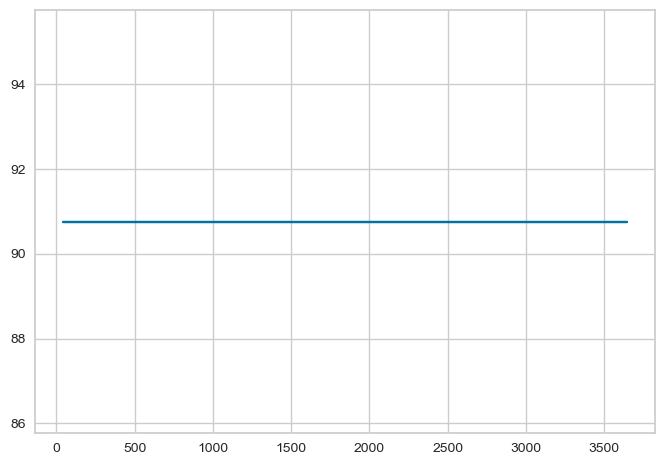

In [92]:
plt.plot(k_options, performance);

In [93]:
final_model = neighbors.KNeighborsClassifier(345)
final_model.fit(X_train, Y_train)
y_pred = final_model.predict(X_test)
print("if k is 345 then performance is", accuracy_score(Y_test,y_pred)*100)

if k is 345 then performance is 90.75804776739356


In [94]:
final_model.classes_

array(['Attack', 'Data is not available', 'Defender', 'Goalkeeper',
       'Midfield'], dtype=object)

In [95]:
final_model.n_neighbors #Value of K

345

#Interpretation
The model achieved an accuracy of 90.75%, indicating that it correctly classified 90.75% of the test samples. This is a relatively high accuracy score, suggesting that the model is performing well.

In [96]:
cleaned_df.columns

Index(['game_event_id', 'game_id', 'minute', 'type_x', 'player_in_id',
       'competition_id_x', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'appearance_id', 'date',
       'player_name_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_lineups_id', 'type_y', 'number', 'player_id',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

In [97]:
#Player Profile and Market Value
#Business Objective: Visualize the relationship between player profiles and their market values to identify trends and anomalies.

#Descriptive Analysis
#Q9 How does market value vary across different player positions?
#Q10 What is the distribution of market values among players with different performance metrics (e.g., goals, assists)?
#Q11How does a player's nationality impact their market value?

In [98]:
#Part 5 Player Profile and Market Value using Simple linear regression
#Q12 Can we predict a player's market value based on highest market value in eur ?

In [99]:
enc = LabelEncoder()

In [100]:
cleaned_df['type_y'] = enc.fit_transform(cleaned_df['type_y'])

In [101]:
X_lin = cleaned_df[['type_y']] 
Y_lin = cleaned_df[['market_value_in_eur']] #Temp Model 

In [102]:
X_lin_train, X_lin_test, Y_lin_train, Y_lin_test = train_test_split(X_lin, Y_lin, test_size=0.2, random_state=42)

In [103]:
print(X_lin_train.shape)
print(X_lin_test.shape)
print(Y_lin_train.shape)
print(Y_lin_test.shape)


(3848, 1)
(963, 1)
(3848, 1)
(963, 1)


In [104]:
lin_reg =LinearRegression() #temp model 

In [105]:
lin_reg_model = lin_reg.fit(X_lin_train, Y_lin_train)

In [106]:
lin_reg_model.score(X_lin_train, Y_lin_train)

0.2684018387682299

In [107]:
Y_lin_pred = lin_reg_model.predict(X_lin_test)

In [108]:
print(lin_reg_model.score(Y_lin_test.to_numpy().reshape(-1,1),Y_lin_pred))

-4.582257110106805


In [109]:
r1_2 = r2_score(Y_lin_test, Y_lin_pred)
print(r1_2)

0.0035238255034518717


#Interpretation
The R-squared scores suggest that the linear regression model is performing reasonably well. 
R2 score = 80.69% and training performance is 85.56%

In [110]:
#Q13 Predict a Player's Market Value Based on if the player is team captain or not 

In [111]:
cleaned_df.columns

Index(['game_event_id', 'game_id', 'minute', 'type_x', 'player_in_id',
       'competition_id_x', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'appearance_id', 'date',
       'player_name_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_lineups_id', 'type_y', 'number', 'player_id',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

In [112]:
conti_cor = cleaned_df.select_dtypes(include='number')

In [113]:
conti_cor.corr()['market_value_in_eur']

game_id                        0.298854
minute                        -0.006478
player_in_id                   0.142633
season                        -0.018684
home_club_goals               -0.054051
away_club_goals               -0.030177
home_club_position            -0.005888
away_club_position             0.008716
attendance                    -0.015172
yellow_cards                  -0.045046
red_cards                     -0.006665
goals                         -0.038856
assists                       -0.032517
minutes_played                 0.073486
type_y                         0.479827
number                        -0.024626
player_id                      0.136632
last_season                    0.049932
current_club_id               -0.085426
height_in_cm                  -0.081937
market_value_in_eur            1.000000
highest_market_value_in_eur    0.920964
Name: market_value_in_eur, dtype: float64

In [114]:
categ = cleaned_df.select_dtypes(exclude='number')
categ.columns

Index(['game_event_id', 'type_x', 'competition_id_x', 'round',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'referee', 'home_club_name', 'away_club_name', 'aggregate',
       'competition_type', 'appearance_id', 'date', 'player_name_x',
       'game_lineups_id', 'team_captain', 'position_x', 'name', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'contract_expiration_date', 'agent_name'],
      dtype='object')

In [115]:
enc = LabelEncoder()

In [116]:
XX = cleaned_df[['team_captain']]
YY = cleaned_df[['market_value_in_eur']]  

In [117]:
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.2, random_state=42)

In [118]:
lin_reg_model1 = lin_reg.fit(XX_train, YY_train)

In [119]:
lin_reg_model1.score(XX_train, YY_train)

0.355048597208953

In [120]:
yy_pred = lin_reg.predict(XX_test)

In [121]:
r2 = r2_score(YY_test, yy_pred)
print(r2)

0.11173176773922378


In [122]:
#Q14 Can we predict a player's market value based on their performance metrics (goals, assists, goals, minutes played) and market history (highest market value)?

In [123]:
data = cleaned_df[['goals', 'minutes_played','assists','highest_market_value_in_eur','market_value_in_eur','home_club_goals','yellow_cards','red_cards']]

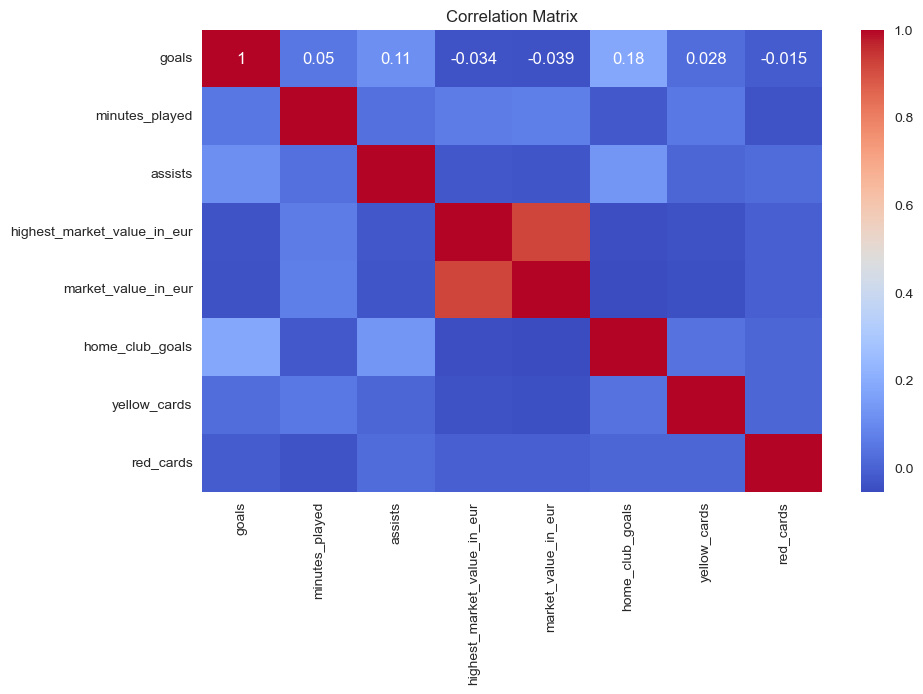

In [124]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [125]:
X_multi = data.drop('market_value_in_eur', axis=1) #dropping the target column for vif

In [126]:
def cal_vif(X_multi):
    vif = pd.Series(name="VIF")
    for i in range(0, X_multi.shape[1]):
        vif[X_multi.columns[i]] = variance_inflation_factor(X_multi.values, i)
    return vif
vif_values = cal_vif(X_multi)

In [127]:
print(vif_values)

goals                          1.048001
minutes_played                 1.013839
assists                        1.029080
highest_market_value_in_eur    1.009590
home_club_goals                1.053673
yellow_cards                   1.007125
red_cards                      1.002228
Name: VIF, dtype: float64


In [128]:
#no columns have been dropped after vif as they are under 10 

In [129]:
selected_features = ['goals','minutes_played','assists','highest_market_value_in_eur','home_club_goals','yellow_cards','red_cards']

In [130]:
X_feature = cleaned_df[selected_features]

In [131]:
Y_feature = cleaned_df[['market_value_in_eur']]

In [132]:
X_feature_train, X_feature_test, Y_feature_train, Y_feature_test = train_test_split(X_feature, Y_feature, train_size=0.70, random_state=42)

In [133]:
print(X_feature_train.shape)
print(X_feature_test.shape)
print(Y_feature_test.shape)
print(Y_feature_train.shape)

(3367, 7)
(1444, 7)
(1444, 1)
(3367, 1)


In [134]:
Lin_reg_model_two = lin_reg.fit(X_feature_train.values, Y_feature_train.values)

In [135]:
print(Lin_reg_model_two.score(X_feature_train.values, Y_feature_train.values))

0.8529820355826553


In [136]:
Y_feature_pred = Lin_reg_model_two.predict(X_feature_test.values)

In [137]:
mse = mean_squared_error(Y_feature_test,Y_feature_pred)
print("MSE",mse)
mse = mean_squared_error(Y_feature_pred, Y_feature_test, squared=False)
print("RMSE=",mse)

print("MAE =",  mean_absolute_error(Y_feature_test,Y_feature_pred))

r_squared = r2_score(Y_feature_test, Y_feature_pred)
print("R2 =", r_squared) 

MSE 0.15215393852622935
RMSE= 0.3900691458270307
MAE = 0.10588814214223556
R2 = 0.8348171198328725


In [138]:
#Interpretation
#Since the training performance is 85.29% and R2 score is 83.48%. This tells us that the model is reliable .

In [139]:
#Part 6
#Team Comparison
#Business Objective: Compare and visualize team performance across various metrics to identify strengths, weaknesses, and areas for improvement.


#Q15What is the away club team performance for different season?
#Q16 What is the comparative analysis of offensive and defensive metrics among top 5home club  teams?
#offensive metrics = home club goalss
#defensive metrics = yellow cards + red card

#Excel Q Is there a significant difference in the  goals scored by teams at home vs. away club?

In [140]:
#Part7
#Attendance and Stadium Analysis
#Business Objective: Visualize attendance trends and stadium utilization to optimize fan engagement and stadium operations.

#Q17 What are the attendance trends for top 10 home club name#
#Q18 How does attendance fluctuate from the beginning to the end of the season

#KNN
Q Can we predict the type of competition for home and away club while considering their attendance performance

In [141]:
enc = LabelEncoder()

In [142]:
cleaned_df['home_club_name'] = enc.fit_transform(cleaned_df['home_club_name'])
cleaned_df['away_club_name'] = enc.fit_transform(cleaned_df['away_club_name'])
cleaned_df['season'] = enc.fit_transform(cleaned_df['season'])
cleaned_df['stadium'] = enc.fit_transform(cleaned_df['stadium'])
cleaned_df['referee'] = enc.fit_transform(cleaned_df['referee'])

In [143]:
X_k = cleaned_df[['home_club_name', 'away_club_name','season','attendance','referee','home_club_goals','away_club_goals','stadium']]
Y_k = cleaned_df[['competition_type']]

In [144]:
X_k_train, X_k_test, Y_k_train, Y_k_test = train_test_split(X_k, Y_k, test_size=0.2, random_state=42)

In [145]:
print(X_k_train.shape)
print(X_k_test.shape)
print(Y_k_train.shape)
print(Y_k_test.shape)

(3848, 8)
(963, 8)
(3848, 1)
(963, 1)


In [146]:
performance1 = []
k_options1 = np.arange(45,3700,60)
for which_k1 in k_options1:
    temp_model1 = neighbors.KNeighborsClassifier(which_k1)
    temp_model1.fit(X_k_train, Y_k_train)
    Y_k_pred = temp_model1.predict(X_k_test)
    print("if k is", which_k1, "performace is", accuracy_score(Y_k_test,Y_k_pred)*100)
    performance1.append( accuracy_score(Y_k_test,Y_k_pred)*100)

if k is 45 performace is 88.05815160955348
if k is 105 performace is 86.6043613707165
if k is 165 performace is 85.35825545171339
if k is 225 performace is 84.73520249221184
if k is 285 performace is 84.52751817237798
if k is 345 performace is 84.11214953271028
if k is 405 performace is 83.28141225337488
if k is 465 performace is 83.07372793354102
if k is 525 performace is 82.2429906542056
if k is 585 performace is 82.13914849428868
if k is 645 performace is 81.20456905503634
if k is 705 performace is 80.26998961578401
if k is 765 performace is 78.92004153686398
if k is 825 performace is 78.29698857736241
if k is 885 performace is 77.77777777777779
if k is 945 performace is 76.94704049844236
if k is 1005 performace is 76.73935617860852
if k is 1065 performace is 76.42782969885774
if k is 1125 performace is 75.80477673935619
if k is 1185 performace is 75.28556593977154
if k is 1245 performace is 74.66251298027
if k is 1305 performace is 74.35098650051921
if k is 1365 performace is 74.14

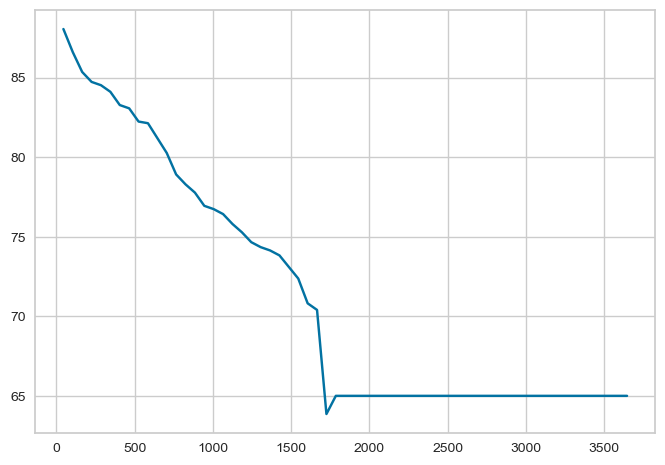

In [147]:
plt.plot(k_options1, performance1);

In [148]:
final_model1 = neighbors.KNeighborsClassifier(45)
final_model1.fit(X_k_train, Y_k_train)
y_kk_pred = final_model1.predict(X_k_test)
print("if k is 45 then performance is", accuracy_score(Y_k_test,y_kk_pred)*100)

if k is 45 then performance is 88.05815160955348


In [149]:
final_model1.n_neighbors #Value of K

45

#Interpretation
The model achieved an accuracy of 88.05%, indicating that it correctly classified 88.05% of the test samples. This is a relatively high accuracy score, suggesting that the model is performing well.

In [150]:
#Part 8
#Referee Analysis(A)
#Business Objective: Analyze and visualize referee decisions and their impact on match outcomes to ensure fairness and consistency.
#Q19 What is the distribution of yellow and red cards given by different referees over the season?#Q
#Q20 Average fouls received by home and away clubs

#Substitution Patterns(B)

#Business Objective: Visualize substitution patterns and their impact on match outcomes to optimize in-game strategies.)
#Q21 What are the minutes played by the subsituted players?
#Q22 What are the top 10 teams in away club who make the most substitutions?

#Event Analysis(C)

#Business Objective: Analyze and visualize key match events (e.g., goals, fouls, corners) to identify patterns and strategic insights 
#Q23 4What is the distribution of match events (e.g., goals, cards) across different away club teams
#Q24 What is the proportion of goals scored by different players within FC Koin from away club?

In [151]:
#Part 9
#Competition Analysis
#Business Objective: Visualize competition-level metrics to assess team and player performance in different competitions.

#Q25 What is the distribution of goals and assists in different competitions?
#Q26 How do team performances vary across different competitions?

In [152]:
#Part 10
#Player Attributes and Demographics
#Business Objective: Visualize player attributes and demographics to identify trends and insights for talent management.

#Q27 How do physical attributes such as height vary across different player positions?
#Q28 Which nationalities are most represented among players?
#Contract Managemet:
#Business Objective: Analyze and visualize player contracts to optimize contract negotiations and financial planning.
#Q29 To analyze the contract expiration date accross different positions.
#Q30 To analyze the player’s average market value w.r.t to their contract expiry date.

In [153]:
#Player Attributes and Demographics

In [154]:
#QSegmenting Players Based on Market Value and Height

In [155]:
cleaned_df.shape

(4811, 49)

In [156]:
means_df = cleaned_df.copy()

In [157]:
means_df = cleaned_df.drop(['game_event_id', 'game_id', 'minute', 'type_x', 'player_in_id',
       'competition_id_x', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'appearance_id', 'date',
       'player_name_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_lineups_id', 'type_y', 'number', 'player_id',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],axis=1)

In [158]:
err=[]
mycluster2 = np.arange(2,20)
for f in mycluster2:
    model = KMeans(n_clusters=f, random_state = 42)
    model.fit(means_df)
    sil_avg = silhouette_score(means_df, model.labels_)
    print("For n_clusters =", f)
    print("The average silhouette_score is :",sil_avg)

For n_clusters = 2
The average silhouette_score is : 0.9391587292684048
For n_clusters = 3
The average silhouette_score is : 0.9387509756739723
For n_clusters = 4
The average silhouette_score is : 0.9572655847841218
For n_clusters = 5
The average silhouette_score is : 0.9587921875812483
For n_clusters = 6
The average silhouette_score is : 0.9599571633976804
For n_clusters = 7
The average silhouette_score is : 0.9636401928875066
For n_clusters = 8
The average silhouette_score is : 0.96298253680674
For n_clusters = 9
The average silhouette_score is : 0.9656566867194585
For n_clusters = 10
The average silhouette_score is : 0.9681803520331517
For n_clusters = 11
The average silhouette_score is : 0.969167983419714
For n_clusters = 12
The average silhouette_score is : 0.9691501090393507
For n_clusters = 13
The average silhouette_score is : 0.9690542564670268
For n_clusters = 14
The average silhouette_score is : 0.9722498302771104
For n_clusters = 15
The average silhouette_score is : 0.972136

In [159]:
for myclust in mycluster2:
    model=KMeans(n_clusters= myclust, random_state=42)
    model.fit(means_df)
    sil_avg=silhouette_score(means_df, model.labels_)
    

In [160]:
#final value of k is 18

In [161]:
final_km=KMeans(n_clusters=82, random_state=42)
final_km.fit(means_df)
final_centroid=final_km.cluster_centers_
print("final centroids are",final_centroid)
final_labels=final_km.labels_
print("final labels are",final_labels)
print("errors are",final_km.inertia_) 
print("for n_cluster=",myclust, "calinski_harabasz_score is:",calinski_harabasz_score(means_df, final_km.labels_)) 
print("for n_cluster=",myclust, "davies_bouldin_scoreis:",davies_bouldin_score(means_df, final_km.labels_)) 


final centroids are [[  0.02015816  -0.13327674]
 [  0.02015816   4.66952766]
 [ -4.29010338  -0.79966585]
 [  5.40798507  -0.87370909]
 [ -3.21253799   9.07209836]
 [ -6.44523414   3.06859286]
 [  1.09772354   7.07092986]
 [  3.791637     2.26812546]
 [  1.63650623   0.06684011]
 [ -1.59618992  -0.78794472]
 [  1.09772354   9.07209836]
 [ -3.21253799  -0.2266646 ]
 [ -6.98401683  -0.7669801 ]
 [ 11.33459468  -0.13327674]
 [  2.71407161   3.06859286]
 [  3.791637    -0.13327674]
 [  6.48555045  -0.33339359]
 [ -5.36766876  -0.56352797]
 [  2.71407161  -0.66558756]
 [ -2.6737553   -0.63231814]
 [  1.63650623  -0.65358055]
 [ -4.29010338   7.07092986]
 [  4.33041969   1.86789176]
 [-11.29427837  -0.83368572]
 [ -4.29010338   0.86730751]
 [  1.09772354   2.66835916]
 [  5.94676776  -0.13327674]
 [ -5.90645145   1.06742436]
 [  9.17946391  -0.13327674]
 [ -1.59618992  -0.16662955]
 [ -3.75132069  -0.65929817]
 [  1.09772354  -0.18330595]
 [  0.55894085   3.86906026]
 [ -2.6737553    7.0709

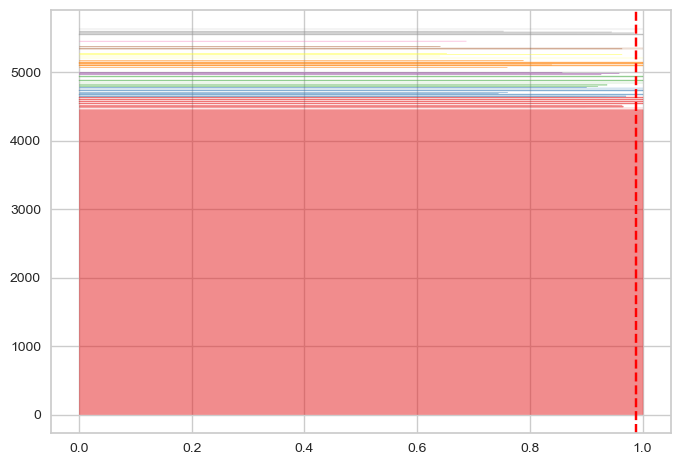

In [162]:
vis=SilhouetteVisualizer(final_km)
vis.fit(means_df);

In [163]:
means_df1=pd.DataFrame(means_df)
means_df1

,height_in_cm,market_value_in_eur
0,0.020158,-0.133277
1,0.020158,-0.133277
2,0.020158,-0.133277
3,0.020158,-0.133277
4,0.020158,-0.133277
...,...,...
4806,5.407985,0.667191
4807,2.714072,-0.133277
4808,-0.518625,-0.813674
4809,-4.290103,-0.773651


In [164]:
means_df1["group"]=final_km.labels_

In [165]:
means_df1

,height_in_cm,market_value_in_eur,group
0,0.020158,-0.133277,0
1,0.020158,-0.133277,0
2,0.020158,-0.133277,0
3,0.020158,-0.133277,0
4,0.020158,-0.133277,0
...,...,...,...
4806,5.407985,0.667191,49
4807,2.714072,-0.133277,74
4808,-0.518625,-0.813674,78
4809,-4.290103,-0.773651,2


In [166]:
final_km.cluster_centers_

array([[  0.02015816,  -0.13327674],
       [  0.02015816,   4.66952766],
       [ -4.29010338,  -0.79966585],
       [  5.40798507,  -0.87370909],
       [ -3.21253799,   9.07209836],
       [ -6.44523414,   3.06859286],
       [  1.09772354,   7.07092986],
       [  3.791637  ,   2.26812546],
       [  1.63650623,   0.06684011],
       [ -1.59618992,  -0.78794472],
       [  1.09772354,   9.07209836],
       [ -3.21253799,  -0.2266646 ],
       [ -6.98401683,  -0.7669801 ],
       [ 11.33459468,  -0.13327674],
       [  2.71407161,   3.06859286],
       [  3.791637  ,  -0.13327674],
       [  6.48555045,  -0.33339359],
       [ -5.36766876,  -0.56352797],
       [  2.71407161,  -0.66558756],
       [ -2.6737553 ,  -0.63231814],
       [  1.63650623,  -0.65358055],
       [ -4.29010338,   7.07092986],
       [  4.33041969,   1.86789176],
       [-11.29427837,  -0.83368572],
       [ -4.29010338,   0.86730751],
       [  1.09772354,   2.66835916],
       [  5.94676776,  -0.13327674],
 

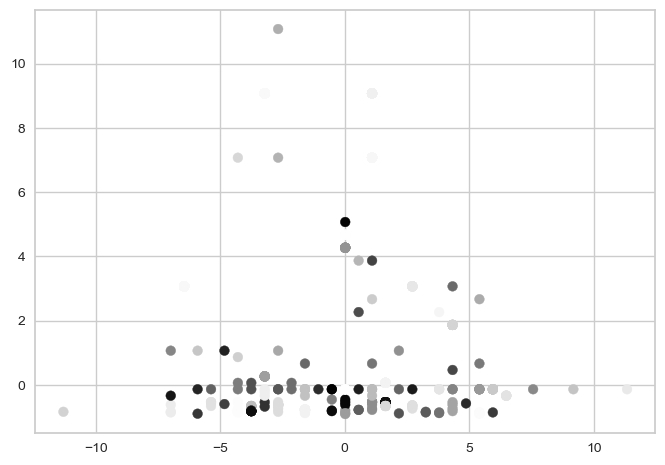

In [167]:
plt.scatter( means_df1['height_in_cm'], means_df1['market_value_in_eur'],c = final_km.labels_)